In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

C:\Users\wkaco\AppData\Local\Temp\ipykernel_22516\4234195465.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
df = pd.read_csv("C:/Users/wkaco/Desktop/classified_data.csv", index_col=0)

In [5]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [8]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler

In [14]:
scaler.fit(df.drop("TARGET CLASS", axis=1))

StandardScaler()

In [17]:
scaled_features = scaler.transform(df.drop("TARGET CLASS", axis=1))

In [19]:
scaled_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [21]:
df_features = pd.DataFrame(scaled_features, columns=df.columns[:-1])

In [33]:
X = df_features
y = df['TARGET CLASS']

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [38]:
knn = KNeighborsClassifier(n_neighbors =1)

In [39]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [40]:
prediction = knn.predict(X_test)

In [42]:
from sklearn.metrics import classification_report, confusion_matrix

In [44]:
print(confusion_matrix(y_test, prediction))

[[146   9]
 [ 11 164]]


In [45]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       155
           1       0.95      0.94      0.94       175

    accuracy                           0.94       330
   macro avg       0.94      0.94      0.94       330
weighted avg       0.94      0.94      0.94       330



In [47]:
error_rate = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    prediction_i = knn.predict(X_test)
    error_rate.append(np.mean(prediction_i != y_test))

In [49]:
#error_rate

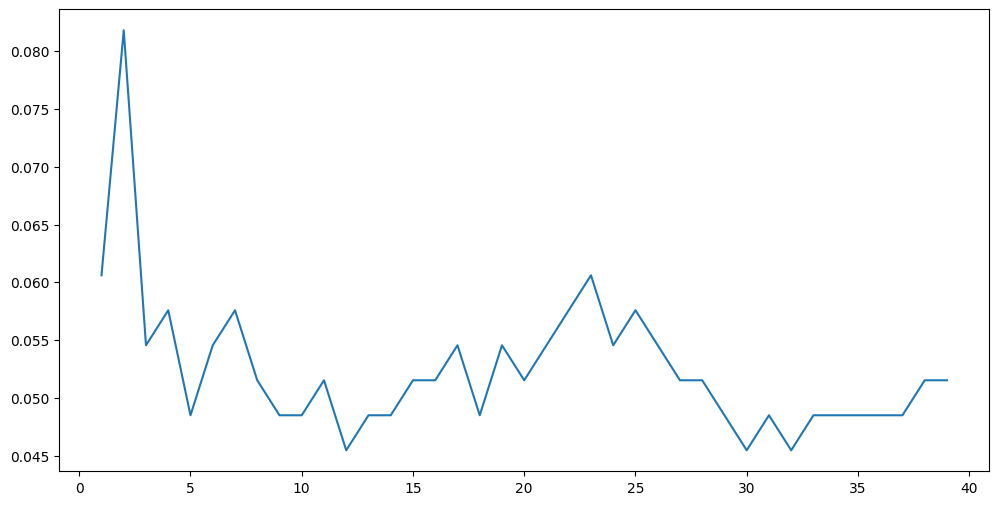

In [51]:
plt.figure(figsize=(12,6))
plt.plot(range(1, 40), error_rate)

In [72]:
knn = KNeighborsClassifier(n_neighbors=12)

In [73]:
knn.fit(X_train, y_train)
prediction_12 = knn.predict(X_test)
print(confusion_matrix(y_test, prediction_12))

[[149   6]
 [  9 166]]


In [74]:
print(classification_report(y_test, prediction_12))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       155
           1       0.97      0.95      0.96       175

    accuracy                           0.95       330
   macro avg       0.95      0.95      0.95       330
weighted avg       0.95      0.95      0.95       330

